In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statistics import mean
from math import sqrt

In [2]:
data=pd.read_csv('iris.csv')
table={
    'petalDims':[
        data[['petal.length','petal.width']].loc[0:49].to_numpy()
        ,data[['petal.length','petal.width']].loc[50:99].to_numpy()
        ,data[['petal.length','petal.width']].loc[100:149].to_numpy()
    ]
    ,'variety':[
        data[['variety']].loc[0:49].to_numpy()
        ,data[['variety']].loc[50:99].to_numpy()
        ,data[['variety']].loc[100:149].to_numpy()

    ]
    }

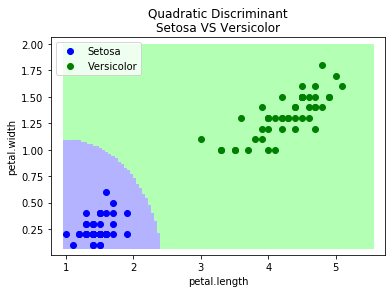

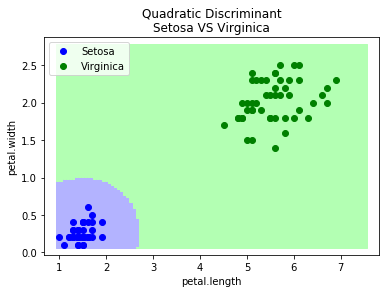

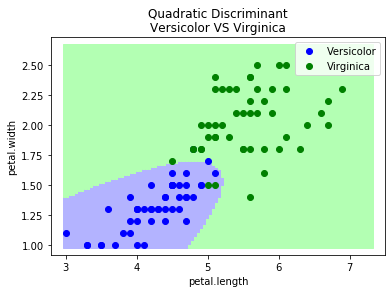

In [3]:
#----------------------------plotting Data with Quadratic Discriminant--------------------------------
for x in range(3):
    for y in range(x+1,3):
        #get Data from table
        petal=np.array([table['petalDims'][x],table['petalDims'][y]]).reshape(100,2)
        varieties=np.array([table['variety'][x],table['variety'][y]]).flatten()
        #calculating statistics properties
        mu=np.array([mean(petal[0:49,0]),mean(petal[0:49,1])]).reshape(2,1)
        nu=np.array([mean(petal[50:99,0]),mean(petal[50:99,1])]).reshape(2,1)
        S=np.cov(petal[0:49].T)
        L=np.cov(petal[50:99].T)

        #plot
        XX=max(petal[:,0])-min(petal[:,0])
        XX=1.1*XX
        YY=max(petal[:,1])-min(petal[:,1])
        YY=1.1*YY
        plt.figure()
        for i in range(101):
            for j in range(101):
                xx=min(petal[:,0])+i*(XX/100)
                yy=min(petal[:,1])+j*(YY/100)
                X=np.array([xx,yy]).reshape(2,1)
                Q1=np.matmul((X-mu).T,np.matmul(np.linalg.inv(S),(X-mu)))
                Q2=np.matmul((X-nu).T,np.matmul(np.linalg.inv(L),(X-nu)))
                detS=np.linalg.det(S)
                detL=np.linalg.det(L)
                
                C=0.5*(Q2-Q1)+np.log(sqrt(detL)/sqrt(detS))
                if C>0:
                    plt.plot(xx,yy,marker='s',color=(0.7,0.7,1))
                else:
                    plt.plot(xx,yy,marker='s',color=(0.7,1,0.7))
        plt.plot(petal[0:49,0],petal[0:49,1],'bo',label=varieties[0])
        plt.plot(petal[50:99,0],petal[50:99,1],'go',label=varieties[99])
        plt.xlabel('petal.length')
        plt.ylabel('petal.width')
        plt.title('Quadratic Discriminant\n%s VS %s'%(varieties[0],varieties[99]))
        plt.legend()
        plt.show()